# Network Analysis of PhilGEPS: A Bipartite Analysis of Government Organization and Corporate Awardees (Year 2014 Analysis)

This is a raw notebook of the analysis for the year 2014. A merged analysis can be found at `Network-Science-Final-Project-with-Journal-Insights`.

## Import libraries required

In [1]:
#Import all the necessary libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import community
import collections
from networkx.algorithms import bipartite
import seaborn as sns

## Loading Datasets

### 2014 Datasets

Using the Bid and Award Details for 2014. Data was downloaded from: https://www.philgeps.gov.ph/opendataSRD.html. The data was collected for January to December 2014.

In [2]:
df1_2014 = pd.read_excel('Bid Notice and Award Details Jan-Mar 2014.xlsx',header=3)

In [3]:
df2_2014 = pd.read_excel('Bid Notice and Award Details Apr-June 2014.xlsx',header=3)

In [4]:
df3_2014 = pd.read_excel('Bid Notice and Award Details July-Sept 2014.xlsx',header=3)

In [5]:
df4_2014 = pd.read_excel('Bid Notice and Award Details Oct-Dec 2014.xlsx',header=3)

The dataframes were combined to a new dataframe `df`

In [6]:
df_2014 = pd.concat([df1_2014, df2_2014, df3_2014, df4_2014], ignore_index=True)

In [7]:
df_2014.columns

Index(['Organization Name', 'Reference ID', 'Solicitation No.', 'Notice Title',
       'Publish Date', 'Classification', 'Notice Type', 'Business Category',
       'Funding Source', 'Funding Instrument', 'Procurement Mode',
       'Trade Agreement', 'Approved Budget of the Contract',
       'Area of Delivery', 'Contract Duration', 'Calendar Type',
       'Line Item No', 'Item Name', 'Item Desc', 'Quantity', 'UOM',
       'Item Budget', 'PreBid Date', 'Closing Date', 'Notice Status',
       'Award No.', 'Award Title', 'Award Type', 'UNSPSC Code',
       'UNSPSC Description', 'Awardee Corporate Title', 'Contract Amount',
       'Contract No', 'Publish Date(Award)', 'Award Date',
       'Notice to Proceed Date', 'Contract Efectivity Date',
       'Contract End Date', 'Reason for Award', 'Award Status'],
      dtype='object')

In [8]:
df_2014.head(5)

,Organization Name,Reference ID,Solicitation No.,Notice Title,Publish Date,Classification,Notice Type,Business Category,Funding Source,Funding Instrument,...,Awardee Corporate Title,Contract Amount,Contract No,Publish Date(Award),Award Date,Notice to Proceed Date,Contract Efectivity Date,Contract End Date,Reason for Award,Award Status
0,"CITY OF SAN CARLOS, NEGROS OCCIDENTAL",2504181,PR 18-13-12-1989 - CED,"PR 18-13-12-1989, FOR USE IN THE CONSTRUCTION ...",2014-01-01,Goods,Invitation to Bid (ITB),Construction Materials and Supplies,Government of the Philippines (GOP),Budget for the Contract Approved by the Sanggu...,...,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN,NaN
1,"CITY OF SAN CARLOS, NEGROS OCCIDENTAL",2504189,PR 1-13-12-1994 - CMO (CDRRMO),"PR 1-13-12-1994, TO BE USED BY THE EMERGENCY M...",2014-01-01,Goods,Invitation to Bid (ITB),Fire Fighting & Rescue and Safety Equipment,Government of the Philippines (GOP),Budget for the Contract Approved by the Sanggu...,...,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN,NaN
2,"CITY OF SAN CARLOS, NEGROS OCCIDENTAL",2504193,PR 1-13-11-1946 - CMO (CDRRMO) (REBIDDING),"PR 1-13-11-1946, TO BE USED BY THE CITY DISAST...",2014-01-01,Goods,Invitation to Bid (ITB),Information Technology Parts & Accessories & P...,Government of the Philippines (GOP),Budget for the Contract Approved by the Sanggu...,...,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN,NaN
3,"CITY OF SAN CARLOS, NEGROS OCCIDENTAL",2504196,PR 1-13-05-0890 - CED,"PR 1-13-05-0890, FOR USE IN THE IMPROVEMENT AL...",2014-01-01,Goods,Invitation to Bid (ITB),Fuels/Fuel Additives & Lubricants & Anti Corro...,Government of the Philippines (GOP),Budget for the Contract Approved by the Sanggu...,...,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN,NaN
4,"CITY OF SAN CARLOS, NEGROS OCCIDENTAL",2504202,PR 4-13-12-1976 - CWD,"PR 4-13-12-1976, FOR USE OF GENERATING SET 175...",2014-01-01,Goods,Invitation to Bid (ITB),Electronic Parts and Components,Government of the Philippines (GOP),Budget for the Contract Approved by the Sanggu...,...,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN,NaN


To check if the dataframes combined properly

In [9]:
df1_2014.shape[0]+df2_2014.shape[0]+df3_2014.shape[0]+df4_2014.shape[0]-df_2014.shape[0]

0

# Exploratory Data Analysis

## 2014 Exploratory Data Analysis

### Funding Instrument Distribution Plot

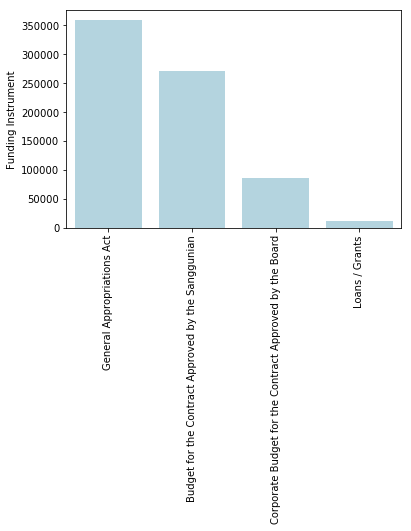

In [97]:
top = df_2014['Funding Instrument'].value_counts()
chart = sns.barplot(top.index, top, color='lightblue');
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

### Notice Type Distribution Plot

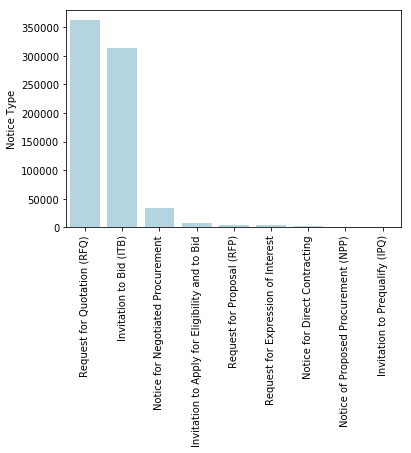

In [95]:
top = df_2014['Notice Type'].value_counts()
chart = sns.barplot(top.index, top, color='lightblue');
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

### Reason for Award Distribution Plot

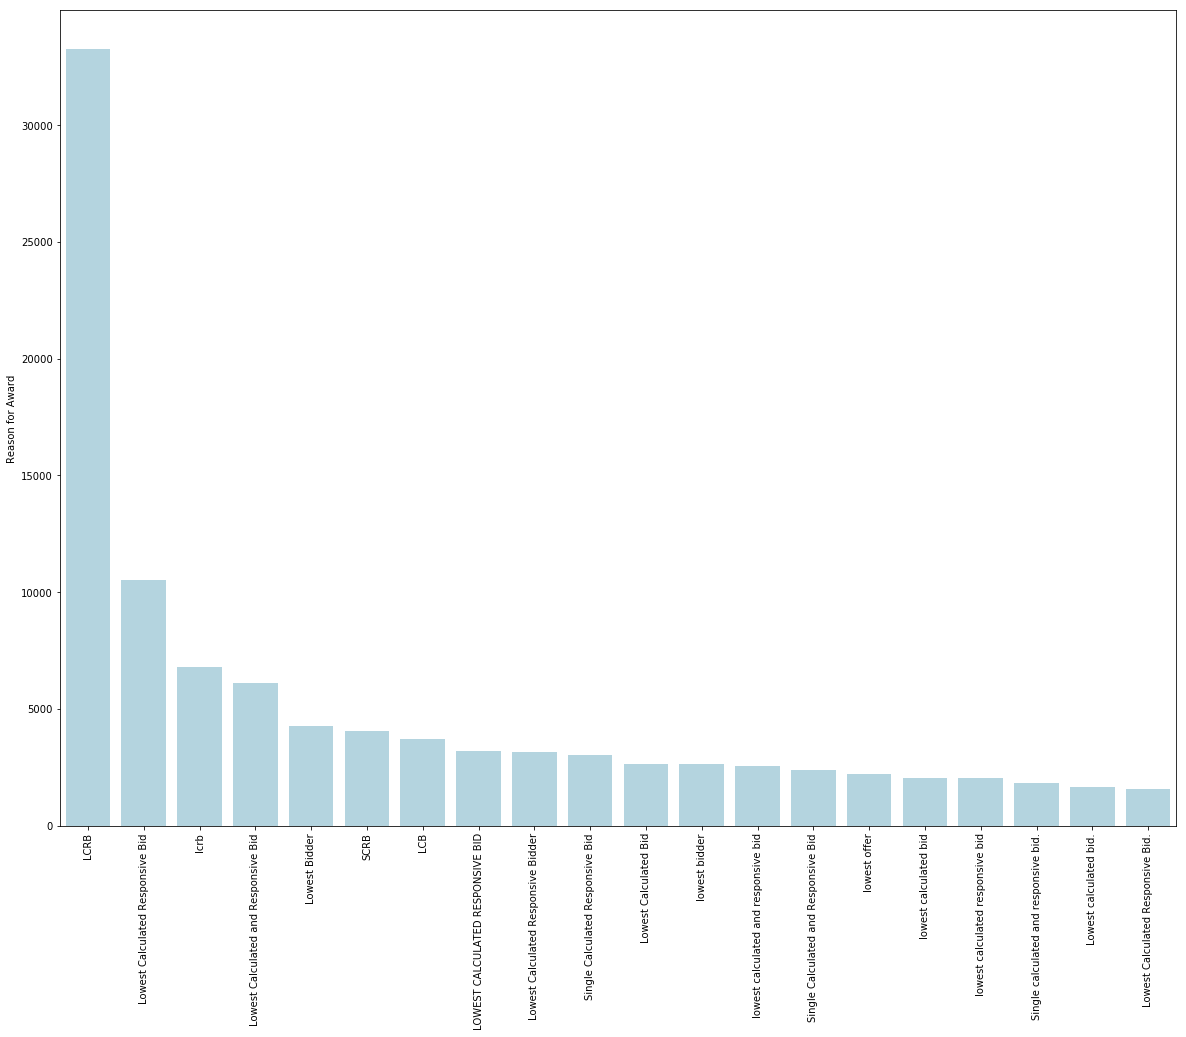

In [96]:
fig_dims = (20, 15)
fig, ax = plt.subplots(figsize=fig_dims)
top = df_2014['Reason for Award'].value_counts().head(20)
chart = sns.barplot(top.index, top, color='lightblue');
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);


### Business Category Distribution Plot

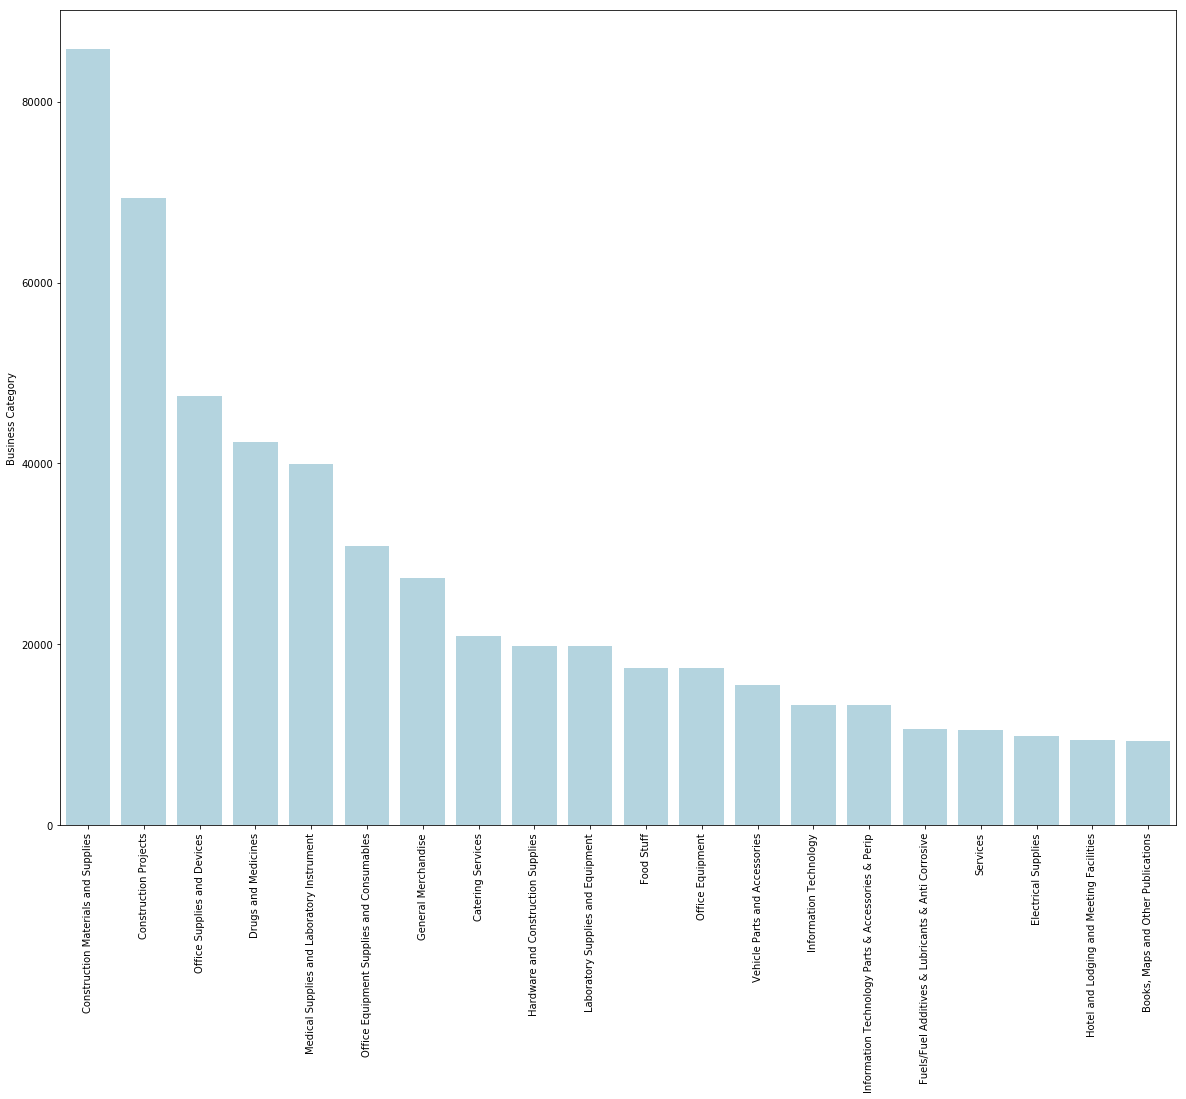

In [98]:
fig_dims = (20, 15)
fig, ax = plt.subplots(figsize=fig_dims)
top = df_2014['Business Category'].value_counts().head(20)
chart = sns.barplot(top.index, top, color='lightblue');
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);


### Contract Amount by Notice Type Boxplot

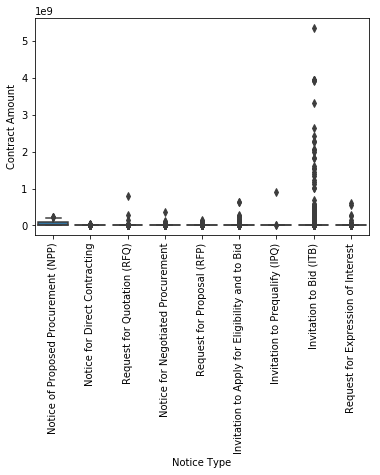

In [14]:
sorted_nb = df_2014.groupby(['Notice Type'])['Contract Amount'].median().sort_values()
chart = sns.boxplot(x=df_2014['Notice Type'], y=df_2014['Contract Amount'], order=list(sorted_nb.index))
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

### Contract Amount by Business Category Boxplot

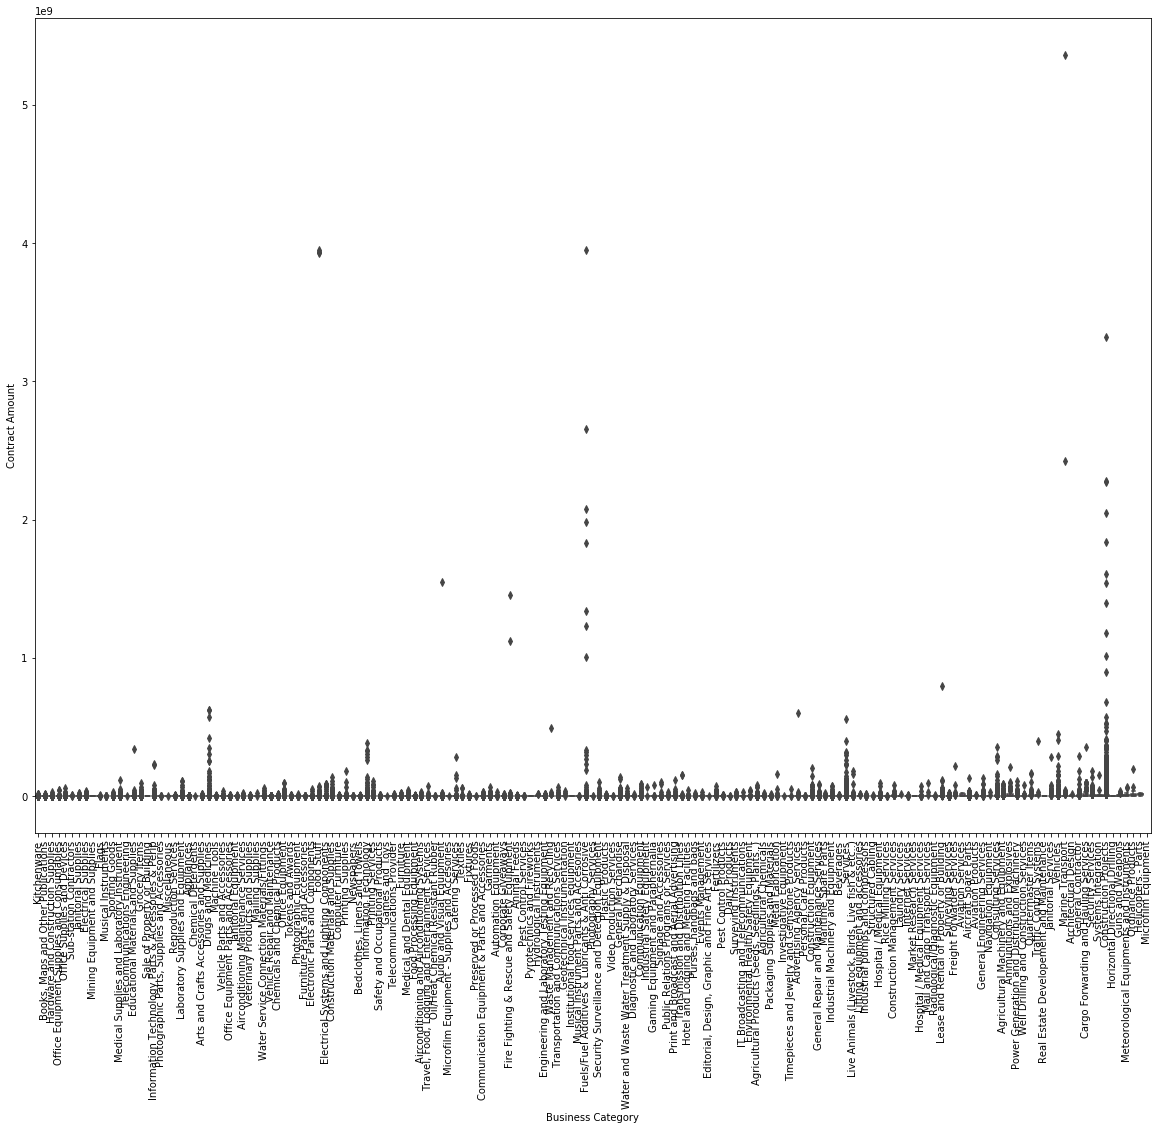

In [15]:
fig_dims = (20, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sorted_nb = df_2014.groupby(['Business Category'])['Contract Amount'].median().sort_values()
chart = sns.boxplot(x=df_2014['Business Category'], y=df_2014['Contract Amount'], ax=ax, order=list(sorted_nb.index))
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

### Contract Amount vs Approved Budget of the Contract Jointplot

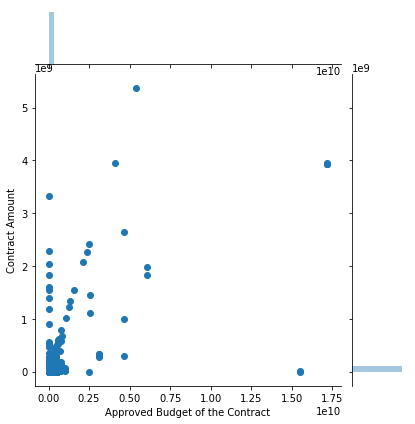

In [16]:
sns.jointplot(x=df_2014['Approved Budget of the Contract'], y=df_2014['Contract Amount']);

# Building the Network

## Building the Network for Year 2014

### Filtering Using a Hard Threshold on Contract Amount

Only the top 20% of the `Contract Amount` will be taken. The threshold amount is **822,492 Philippine Pesos**

In [17]:
df_2014['Contract Amount'].quantile(0.8)

769216.0020000003

In [18]:
df_filtered_2014 = df_2014.loc[df_2014['Contract Amount'] > 0]

In [19]:
d_2014=df_2014.loc[df_2014['Awardee Corporate Title'] =="MASANGKAY COMPUTER CENTER"]

In [20]:
d_2014['Business Category'].unique()

array(['Information Technology',
       'Information Technology Parts & Accessories & Perip',
       'Office Supplies and Devices',
       'Office Equipment Supplies and Consumables',
       'Communication Equipment & Parts and Accessories',
       'Office Equipment', 'Transportation and Communications Services',
       'Sporting Goods', 'Computer Furniture', 'Photographic Equipment',
       'Communication Equipment', 'Printing Supplies',
       'Audio and Visual Equipment',
       'Office Equipment Parts and Accessories',
       'Power Generation and Distribution Machinery'], dtype=object)

In [21]:
d_2014= d_2014[['Business Category','Contract Amount']]

In [22]:
d_2014

,Business Category,Contract Amount
6106,Information Technology,640268.8
7878,Information Technology Parts & Accessories & P...,13789.0
14512,Office Supplies and Devices,155316.0
18335,Information Technology,399600.0
23332,Information Technology Parts & Accessories & P...,52900.0
...,...,...
710644,Information Technology Parts & Accessories & P...,64780.0
710648,Information Technology Parts & Accessories & P...,21890.0
713733,Information Technology Parts & Accessories & P...,788974.0
715753,Information Technology,463988.0


In [23]:
d_2014.groupby(['Business Category']).sum()


,Contract Amount
Business Category,
Audio and Visual Equipment,3.799200e+04
Communication Equipment,8.718600e+05
Communication Equipment & Parts and Accessories,5.513360e+06
Computer Furniture,8.735698e+06
Information Technology,1.480700e+08
Information Technology Parts & Accessories & Perip,6.037346e+07
Office Equipment,1.017392e+07
Office Equipment Parts and Accessories,1.599270e+06
Office Equipment Supplies and Consumables,1.763761e+07


In [24]:
df_filtered_2014['Contract Amount'].min()

0.01

In [25]:
df_filtered_2014

,Organization Name,Reference ID,Solicitation No.,Notice Title,Publish Date,Classification,Notice Type,Business Category,Funding Source,Funding Instrument,...,Awardee Corporate Title,Contract Amount,Contract No,Publish Date(Award),Award Date,Notice to Proceed Date,Contract Efectivity Date,Contract End Date,Reason for Award,Award Status
17,DEPARTMENT OF PUBLIC WORKS AND HIGHWAYS - QUIR...,2507964,13BK0076,13BK0076 - Construction of Multi-Purpose Build...,2014-01-01,Civil Works,Invitation to Bid (ITB),Construction Projects,Government of the Philippines (GOP),General Appropriations Act,...,COLBY CONSTRUCTION,4364746.13,13BK0076,2014-11-23 15:17:00.310,2014-04-29,2014-05-05 15:00:00,2014-05-12 15:00:00,2014-08-10 15:00:00,LCRB,Updated
18,PANGASINAN STATE UNIVERSITY - ALAMINOS CAMPUS,2507969,PSU_Alaminos_01-2014,Procurement for the Purchase of Athletic Unif...,2014-01-01,Goods,Request for Quotation (RFQ),Sporting Goods,Government of the Philippines (GOP),General Appropriations Act,...,ELGRAM TRADING AND CONSTRUCTION,424215.00,NaN,2014-01-16 14:46:54.230,2014-01-09,NaT,NaT,NaT,Bidder with the Lowest Quotation.,Posted
22,CABANATUAN CITY WATER DISTRICT,2507973,PR#14-0001,Supply & Delivery of Brass Fittings,2014-01-01,Goods,Request for Quotation (RFQ),Water Service Connection Materials/Fittings,Government of the Philippines (GOP),Corporate Budget for the Contract Approved by ...,...,IVANKA INDUSTRIAL SALES CORPORATION,371034.00,14-0014,2014-03-24 15:44:25.187,2014-01-14,2014-01-24 00:00:00,2014-01-27 00:00:00,2014-02-25 00:00:00,Lowest Calculated and Responsive Bid,Updated
23,LAGUNA STATE POLYTECHNIC UNIVERSITY - SINILOAN...,2507974,LSPUSinC-2014-001,Procurement of Security Services,2014-01-01,Goods - General Support Services,Invitation to Bid (ITB),Security Services,Government of the Philippines (GOP),General Appropriations Act,...,"AGLIPAY SECURITY, INC.",3945320.64,LSPUSinC-2014-001,2014-01-29 17:23:43.083,2014-01-27,2014-01-31 00:00:00,2014-01-31 00:00:00,2015-01-31 00:00:00,SCRB,Updated
48,PROVINCE OF LAGUNA,2488740,PGL 01,Medicines and medical supplies for STCAA 2014,2014-01-02,Goods,Request for Quotation (RFQ),Drugs and Medicines,Government of the Philippines (GOP),Budget for the Contract Approved by the Sanggu...,...,GOLD MEDLINES DRUG DISTRIBUTION,437893.50,NaN,2014-06-10 10:32:40.997,2014-01-09,NaT,NaT,NaT,LCRB,Posted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725877,NATIONAL ELECTRIFICATION ADMINISTRATION,2995627,BAC-07-2014,"SUPPLY, DELIVERY, INSTALLATION OF MULTI-MEDIA ...",2014-12-31,Goods,Invitation to Bid (ITB),Information Technology,Government of the Philippines (GOP),Corporate Budget for the Contract Approved by ...,...,"PRONET SYSTEMS INTEGRATED NETWORK SOLUTION, INC.",895420.70,AC-02-s2015,2015-10-12 10:52:28.163,2015-04-10,2015-06-09 00:00:00,2015-06-09 00:00:00,2016-06-09 00:00:00,LCB,Updated
725878,CITY OF LUCENA,2995635,V02-Dec-14,Construction of Two (2) Storey Lucena City Pub...,2014-12-31,Civil Works,Invitation to Bid (ITB),Construction Projects,Government of the Philippines (GOP),Budget for the Contract Approved by the Sanggu...,...,R.V. LABORTE BUILDERS,99897218.54,NaN,2015-02-11 16:08:49.157,2015-01-28,NaT,NaT,NaT,Lowest Calculated Responsive Bid,Posted
725879,DEPARTMENT OF PUBLIC WORKS AND HIGHWAYS - SORS...,2995640,14FL0070,14FL0070 - Replacement of Permanent Weak Bridg...,2014-12-31,Civil Works,Invitation to Bid (ITB),Construction Projects,Government of the Philippines (GOP),General Appropriations Act,...,SUNWEST CONSTRUCTION AND DEVELOPMENT CORPORATION,26843025.92,14FL0070,2015-10-13 18:13:14.260,2015-03-02,2015-03-09 00:00:00,2015-03-06 00:00:00,2015-09-10 00:00:00,LCRB,Updated
725880,DEPARTMENT OF PUBLIC WORKS AND HIGHWAYS - SORS...,2995642,14FL0071,14FL0071 - Replacement of Permanent Weak Bridg...,2014-12-31,Civil Works,Invitation to Bid (ITB),Construction Projects,Government of the Philippines (GOP),General Appropriations Act,...,CENTERWAYS CONCTRUCTION AN

In [26]:
df_filtered_2014['Business Category'].unique()

array(['Construction Projects', 'Sporting Goods',
       'Water Service Connection Materials/Fittings', 'Security Services',
       'Drugs and Medicines', 'Information Technology',
       'Transportation and Communications Services',
       'Laboratory Supplies and Equipment', 'Office Equipment',
       'General Merchandise', 'Janitorial Supplies',
       'Electronic Parts and Components',
       'Information Technology Parts & Accessories & Perip',
       'Security Surveillance and Detection Equipment',
       'Office Equipment Parts and Accessories',
       'Construction Materials and Supplies',
       'Fuels/Fuel Additives & Lubricants & Anti Corrosive',
       'Agricultural Products (Seeds, Seedlings, Plants..)',
       'Fertilizers', 'Engineering and Laboratory Testing Equipment',
       'Surveying Instruments', 'Consulting Services',
       'Agricultural Machinery and Equipment',
       'Educational Materials and Supplies', 'Garments',
       'Catering Services', 'Medical Supplie

In [27]:
len(df_filtered_2014['Business Category'].unique())

162

In [28]:
df_filtered_2014 = df_2014.loc[df_2014['Business Category']=='Information Technology']

In [29]:
df_filtered_2014['Business Category'].unique()

array(['Information Technology'], dtype=object)

From the filtered dataframe, only `'Organization Name'`,`'Notice Title'`,`'Awardee Corporate Title'`,'`Contract Amount'` will be included.

In [30]:
data_2014 = df_filtered_2014[['Organization Name','Notice Title','Awardee Corporate Title','Contract Amount']]
data_2014

,Organization Name,Notice Title,Awardee Corporate Title,Contract Amount
33,PHILIPPINE HEALTH INSURANCE CORPORATION,13-0474 - Server with Heavy Duty UPS,NaN,NaN
49,TOURISM INFRASTRUCTURE AND ENTERPRISE ZONE AUT...,"SUPPLY, INSTALLATION, TESTING AND COMMISSIONIN...","INFOBAHN COMMUNICATIONS, INC.",14800000.0
91,UNIVERSITY OF THE PHILIPPINES SYSTEM - DILIMAN,Supply and Installation of a Many-Integrated-C...,S1 TECHNOLOGIES INC.,996800.0
111,UNIVERSITY OF THE PHILIPPINES SYSTEM - DILIMAN,4 units of Branded Laptop Computers (Bid No. 2...,NaN,NaN
115,"MUNICIPALITY OF TAMPAKAN, SOUTH COTABATO",Installation of Electronic Health Record Syste...,NaN,NaN
...,...,...,...,...
725723,PROVINCE OF BOHOL,0807-PR1450-2014 REBID PURCHASE OF UNINTERRUPT...,NaN,NaN
725727,PROVINCE OF BOHOL,0806-PR1449-2014 REBID PURCHASE OF I.T. EQUIPM...,NaN,NaN
725873,PROVINCE OF BOHOL,0812-PR1455-2014 REBID PURCHASE OF I.T. EQUIPM...,NaN,NaN
725875,PROVINCE OF BOHOL,0811-PR1454-2014 REBID PURCHASE OF I.T. EQUIPM...,NaN,NaN


In [31]:
data_2014.loc[data_2014['Awardee Corporate Title']=='MASANGKAY COMPUTER CENTER'].sum()

Organization Name          PHILIPPINE INSTITUTE OF VOLCANOLOGY AND SEISMO...
Notice Title               Supply and Delivery of One (1) lot Laptops and...
Awardee Corporate Title    MASANGKAY COMPUTER CENTERMASANGKAY COMPUTER CE...
Contract Amount                                                   1.4807e+08
dtype: object

Let's check for null values for each column.

In [32]:
data_2014.isna().sum()

Organization Name             0
Notice Title                  6
Awardee Corporate Title    8505
Contract Amount            8505
dtype: int64

Drop the rows with no `Awardee Corporate Title` name

In [33]:
df_try_2014 = data_2014.dropna(subset=['Awardee Corporate Title'])

In [34]:
df_try_2014.isna().sum()

Organization Name          0
Notice Title               2
Awardee Corporate Title    0
Contract Amount            0
dtype: int64

In [35]:
data_2014.isnull().sum()

Organization Name             0
Notice Title                  6
Awardee Corporate Title    8505
Contract Amount            8505
dtype: int64

In [36]:
df_clean_2014 = data_2014.dropna(subset=['Awardee Corporate Title'])

A new colum named `weight` is created. The weight is the count of awarded contracts to the corporation with the name under `Awardee Corporate Title` by a government agency under `Organization Name`.

In [37]:
df_final_2014 = df_clean_2014.groupby(['Organization Name','Awardee Corporate Title']).size().reset_index().rename(columns={0:'weight'})
df_final_2014

,Organization Name,Awardee Corporate Title,weight
0,"401ST CONTRACTING OFFICE, AFP PROCUREMENT SERVICE",EVERYBODY'S TRADING & GENERAL MERCHANDISE,17
1,"405TH CONTRACTING OFFICE, AFP PROCUREMENT SERVICE",ZYRRA KIM ENTERPRISES,1
2,ADVANCED SCIENCE AND TECHNOLOGY INSTITUTE,"ACCENT MICRO PRODUCTS, INC.",1
3,ADVANCED SCIENCE AND TECHNOLOGY INSTITUTE,"ACCENT MICRO TECHNOLOGIES, INC.",3
4,ADVANCED SCIENCE AND TECHNOLOGY INSTITUTE,"ACE ELECTRONIC TECHNOLOGY, INC. DOING BUSINESS...",3
...,...,...,...
1764,WESTERN PHILIPPINES UNIVERSITY,MASANGKAY COMPUTER CENTER,1
1765,WESTERN VISAYAS COLLEGE OF SCIENCE AND TECHNOLOGY,ALTO AUDIO DESIGN CENTER,1
1766,ZAMBOANGA CITY SPECIAL ECONOMIC ZONE AUTHORITY,MASANGKAY COMPUTER CENTER,2
1767,ZAMBOANGA CITY STATE POLYTECHNIC COLLEGE,CEEJAY'S ENTERPRISES,1


In [38]:
df_final_2014.isna().sum()

Organization Name          0
Awardee Corporate Title    0
weight                     0
dtype: int64

In [39]:
df_final_2014.isnull().sum()

Organization Name          0
Awardee Corporate Title    0
weight                     0
dtype: int64

In [40]:
df_final_2014.shape

(1769, 3)

In [41]:
df_final_2014.dropna().shape

(1769, 3)

### Contructing the Bipartite Network

Constructing the bipartite graph using `Networkx`'s **add_nodes_from()** and adding weighted edges using **add_weighted_edges_from()**.

In [42]:
C_2014 = nx.Graph()
C_2014.add_nodes_from(df_final_2014['Organization Name'], bipartite=0)
C_2014.add_nodes_from(df_final_2014['Awardee Corporate Title'], bipartite=1)
edges = df_final_2014[['Organization Name', 'Awardee Corporate Title','weight']].apply(tuple, axis=1)
C_2014.add_weighted_edges_from(edges)

In [43]:
nx.is_bipartite(C_2014)

True

Each edge contains a tuple of two nodes, and the weight of the edge.

Viewing all the edges 

In [44]:
C_2014.edges(data=True)

EdgeDataView([('401ST CONTRACTING OFFICE, AFP PROCUREMENT SERVICE', "EVERYBODY'S TRADING & GENERAL MERCHANDISE", {'weight': 17}), ('405TH CONTRACTING OFFICE, AFP PROCUREMENT SERVICE', 'ZYRRA KIM ENTERPRISES', {'weight': 1}), ('ADVANCED SCIENCE AND TECHNOLOGY INSTITUTE', 'ACCENT MICRO PRODUCTS, INC.', {'weight': 1}), ('ADVANCED SCIENCE AND TECHNOLOGY INSTITUTE', 'ACCENT MICRO TECHNOLOGIES, INC.', {'weight': 3}), ('ADVANCED SCIENCE AND TECHNOLOGY INSTITUTE', 'ACE ELECTRONIC TECHNOLOGY, INC. DOING BUSINESS UNDER THE NAME AND STYLE OF ALEXAN COMMERCIAL', {'weight': 3}), ('ADVANCED SCIENCE AND TECHNOLOGY INSTITUTE', 'AMERICAN TECHNOLOGIES INC.', {'weight': 1}), ('ADVANCED SCIENCE AND TECHNOLOGY INSTITUTE', 'BAYANPC TECHNOLOGIES INC.', {'weight': 1}), ('ADVANCED SCIENCE AND TECHNOLOGY INSTITUTE', 'CAVITECH ENTERPRISE', {'weight': 2}), ('ADVANCED SCIENCE AND TECHNOLOGY INSTITUTE', 'CIM TECHNOLOGIES, INC.', {'weight': 2}), ('ADVANCED SCIENCE AND TECHNOLOGY INSTITUTE', 'CLEAN WORLD TECH CORPORA

The government organizations are assigned as `top_nodes` while the corporations are assigned as `bottom_nodes`.

In [45]:
top_nodes_2014 = {n for n, d in C_2014.nodes(data=True) if d['bipartite']==0}
top_nodes_2014

{'401ST CONTRACTING OFFICE, AFP PROCUREMENT SERVICE',
 '405TH CONTRACTING OFFICE, AFP PROCUREMENT SERVICE',
 'ADVANCED SCIENCE AND TECHNOLOGY INSTITUTE',
 'AFP - BIDS AND AWARDS COMMITTEE',
 'ANTI-MONEY LAUNDERING COUNCIL',
 'APAYAO STATE COLLEGE',
 'AUTHORITY OF THE FREEPORT AREA OF BATAAN',
 'BACOLOD CITY WATER DISTRICT',
 'BAGUIO WATER DISTRICT',
 'BANGKO SENTRAL NG PILIPINAS',
 'BARANGAY 6 POBLACION, CARMONA, CAVITE',
 'BARANGAY 667 ZONE 72 DISTRICT V, MANILA',
 'BARANGAY 837 ZONE 91, MANILA',
 'BARANGAY ABO, NAGCARLAN, LAGUNA',
 'BARANGAY BAGACAY KATIPUHAN, LOON, BOHOL',
 'BARANGAY BAGO-OSHIRO, DAVAO CITY, DAVAO DEL SUR',
 'BARANGAY BAHI, LOON, BOHOL',
 'BARANGAY BALITE, CALAPAN CITY',
 'BARANGAY BANCA-BANCA, NAGCARLAN, LAGUNA',
 'BARANGAY CABUG, LOON, BOHOL',
 'BARANGAY CABUYEW, NAGCARLAN, LAGUNA',
 'BARANGAY CALAWIS, ANTIPOLO',
 'BARANGAY CALAYUGAN SUR, LOON, BOHOL',
 'BARANGAY CAMPATUD, LOON, BOHOL',
 'BARANGAY CANDAIGAN, LOON, BOHOL',
 'BARANGAY CANHANGDON ORIENTAL, LOON, BOHO

In [46]:
bottom_nodes_2014 = set(C_2014) - top_nodes_2014
bottom_nodes_2014

{'16/35 MM PRODUCTION SUPPLY',
 '32 TRADING POST',
 '3GX COMPUTERS & I.T. SOLUTIONS',
 '3JM TELECOMMUNICATION AND ELECTRONIC SUPPLIES',
 '3MSG ENTERPRISES',
 "5J'S METAL CRAFT AND GENERAL MERCHANDISE CO. LTD.",
 '7CORE COMMUNICATIONS INC.',
 '838 TECH UNLTD. CO.',
 'A.G.D. ENTERPRISES',
 'A.Q. ENTERPRISES',
 'AAC TECH SOLUTIONS ENTERPRISES',
 'AAH BRANDING AND GRAPHIC DESIGN',
 'ABENSON VENTURES INC.',
 'ACCEL PRIME TECHNOLOGIES INCORPORATED',
 'ACCENT MICRO PRODUCTS, INC.',
 'ACCENT MICRO TECHNOLOGIES, INC.',
 'ACCESS OFFICE SYSTEMS',
 'ACE ELECTRONIC TECHNOLOGY, INC. DOING BUSINESS UNDER THE NAME AND STYLE OF ALEXAN COMMERCIAL',
 'ACECOM SYSTEM, INC.',
 'ACELOGIC COMPUTER SOLUTIONS',
 'ACL SERVICES (SINGAPORE) PTE. LTD.',
 'ACROPEAK ENTERPRISES',
 'ADECS INTERNATIONAL CORPORATION',
 "ADILYNNE'S GENERAL MERCHANDISE",
 'ADVANCE MICROSYSTEMS CORPORATION',
 'ADVANCE SOLUTIONS, INC.',
 'AEE COMPUTER ONLINE NETWORK, INC.',
 'AG DATACOM PHILS INC.',
 'AJ SOFTDRIVE INTERNET CAFE & COMPUTER S

To visualize the bipartite graph, we use **`nx.bipartite_layout()`**

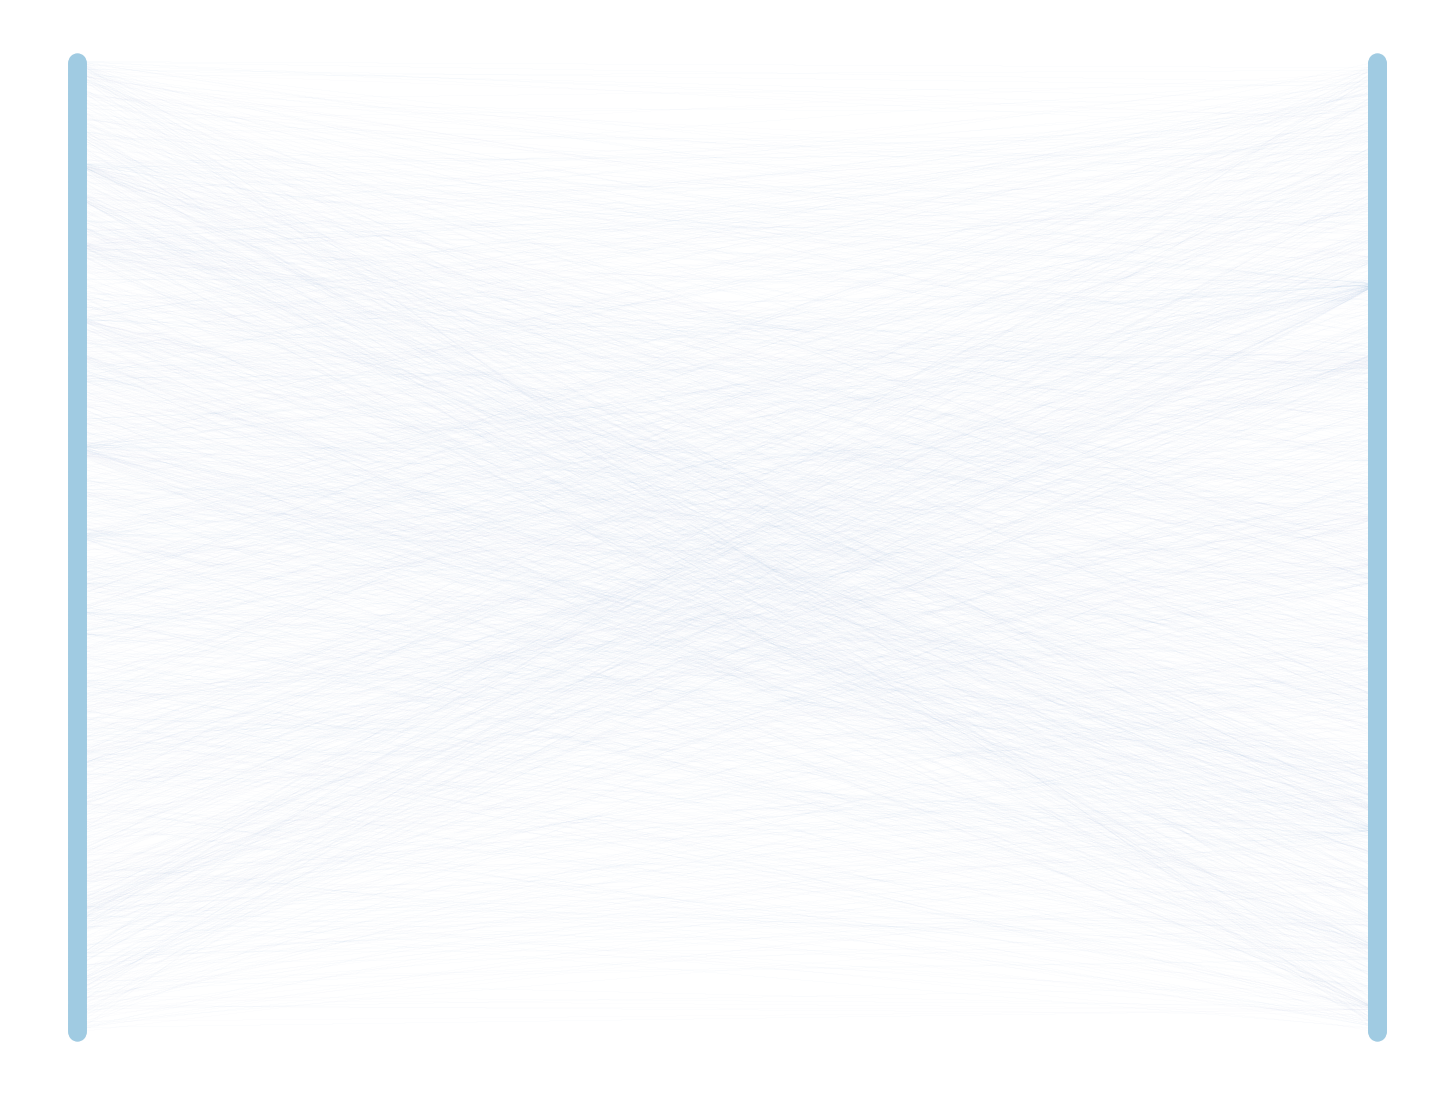

In [47]:
pos = nx.bipartite_layout(C_2014,top_nodes_2014)
plt.figure(figsize=[20,15])
# Pass that layout to nx.draw
nx.draw(C_2014,pos,node_color='#A0CBE2',edge_color='#0071C1',width=.01,
     edge_cmap=plt.cm.Blues,with_labels=False, )


# Network Analysis

## Helper functions

Create a function that returns the quantitative characteristics of a graph like the total number of nodes, number of edges, average degree, clustering coefficient, and number of communities present.

In [48]:
def graph_charac (G):
    N = G.order()
    L = G.size() 
#     D = G.diameter()
#     c = G.center()
    avg_deg = 2*float(L) / N 
    cc = nx.clustering(G)
    avg_clust = sum(cc.values()) / len(cc)
    partition = community.best_partition(G)
    print ('Nodes: ', N)
    print ('Edges: ', L)
    print ('Average degree: ', avg_deg)
#     print ('Diameter: ', D)
#     print ('Center: ', c)
    print('Clustering Coefficient: ',avg_clust)
    print ("Number of Communities: ", len(set(partition.values())))

To create a function that calculates the degree, betweeness, closeness, and eigenvector centralities for an input graph.

In [49]:
def graph_centrality(G):
    pos = nx.fruchterman_reingold_layout(G)
    fig = plt.figure(figsize=(20,15));

    centralities = [list(nx.degree_centrality(G).values()), 
                    list(nx.closeness_centrality(G).values()), 
                    list(nx.betweenness_centrality(G).values()),
                    list(nx.eigenvector_centrality(G).values())]
    titles = ['Degree Centrality', 'Closeness Centrality', 
              'Betweenness Centrality', 'Eigenvector Centrality']

    for i in range(4):
        ax = fig.add_subplot(2, 2, i+1);
        nc = nx.draw_networkx_nodes(G, pos, node_size=300, cmap=plt.cm.RdYlBu_r,
                                node_color=centralities[i]);
        nx.draw_networkx_edges(G, pos, alpha=0.500);
    #     nx.draw_networkx_labels(G, pos, font_color='k');
        plt.title(titles[i]);
        plt.axis('off');
        plt.colorbar(nc);

    plt.show();

In [50]:
def top20_closeness(G, data):
    d = nx.closeness_centrality(G)
    awardee = []
    for w in sorted(d, key=d.get, reverse=True):
        awardee.append(w)
    top20 = awardee[:20]
    top20_cp = []
    for c in top20:
        tot_cp = 0
        for i in range(len(data)):
            if data['Awardee Corporate Title'].iloc[i] == c:
                tot_cp = tot_cp + data['Contract Amount'].iloc[i]
        top20_cp.append(tot_cp)
    df3 = pd.DataFrame(list(zip(top20, top20_cp)), 
                   columns =['Awardee Corporate Title', 'Total Contract Amount']) 
    return df3

In [51]:
def top20_degree(G, data):
    d = nx.degree_centrality(G)
    awardee = []
    for w in sorted(d, key=d.get, reverse=True):
        awardee.append(w)
    top20 = awardee[:20]
    top20_cp = []
    for c in top20:
        tot_cp = 0
        for i in range(len(data)):
            if data['Awardee Corporate Title'].iloc[i] == c:
                tot_cp = tot_cp + data['Contract Amount'].iloc[i]
        top20_cp.append(tot_cp)
    df3 = pd.DataFrame(list(zip(top20, top20_cp)), 
                   columns =['Awardee Corporate Title', 'Total Contract Amount']) 
    return df3

In [52]:
def top20_bet(G, data):
    d = nx.betweenness_centrality(G)
    awardee = []
    for w in sorted(d, key=d.get, reverse=True):
        awardee.append(w)
    top20 = awardee[:20]
    top20_cp = []
    for c in top20:
        tot_cp = 0
        for i in range(len(data)):
            if data['Awardee Corporate Title'].iloc[i] == c:
                tot_cp = tot_cp + data['Contract Amount'].iloc[i]
        top20_cp.append(tot_cp)
    df3 = pd.DataFrame(list(zip(top20, top20_cp)), 
                   columns =['Awardee Corporate Title', 'Total Contract Amount']) 
    return df3

In [53]:
def top20_eigen(G, data):
    d = nx.eigenvector_centrality(G)
    awardee = []
    for w in sorted(d, key=d.get, reverse=True):
        awardee.append(w)
    top20 = awardee[:20]
    top20_cp = []
    for c in top20:
        tot_cp = 0
        for i in range(len(data)):
            if data['Awardee Corporate Title'].iloc[i] == c:
                tot_cp = tot_cp + data['Contract Amount'].iloc[i]
        top20_cp.append(tot_cp)
    df3 = pd.DataFrame(list(zip(top20, top20_cp)), 
                   columns =['Awardee Corporate Title', 'Total Contract Amount']) 
    return df3

The degree distribution for the bipartite and projected graphs will be displayed using the function `deg_distribution`

In [54]:
def deg_distribution(G):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    plt.loglog(deg,cnt)
    plt.title("Degree count plot")
    plt.ylabel("degree")
    plt.xlabel("count")


Create a function to plot different graph layouts.

In [55]:
def graph_layout(G):
    
    fig = plt.figure(figsize=(20,15));
    
    ax = fig.add_subplot(3, 3, 1);
    pos = nx.fruchterman_reingold_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=300, cmap=plt.cm.RdYlBu_r);
    nx.draw_networkx_edges(G, pos, alpha=0.500);
    plt.title('fruchterman_reingold_layout');
    plt.axis('off');
    
    ax = fig.add_subplot(3, 3, 2);
    pos = nx.circular_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=300, cmap=plt.cm.RdYlBu_r);
    nx.draw_networkx_edges(G, pos, alpha=0.500);
    plt.title('circular_layout');
    plt.axis('off');
    
    ax = fig.add_subplot(3, 3, 3);
    pos = nx.random_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=300, cmap=plt.cm.RdYlBu_r);
    nx.draw_networkx_edges(G, pos, alpha=0.500);
    plt.title('random_layout');
    plt.axis('off');
    
    ax = fig.add_subplot(3, 3, 4);
    pos = nx.shell_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=300, cmap=plt.cm.RdYlBu_r);
    nx.draw_networkx_edges(G, pos, alpha=0.500);
    plt.title('shell_layout');
    plt.axis('off');
    
    ax = fig.add_subplot(3, 3, 5);
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=300, cmap=plt.cm.RdYlBu_r);
    nx.draw_networkx_edges(G, pos, alpha=0.500);
    plt.title('spring_layout');
    plt.axis('off');
    
    ax = fig.add_subplot(3, 3, 6);
    pos = nx.spectral_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=300, cmap=plt.cm.RdYlBu_r);
    nx.draw_networkx_edges(G, pos, alpha=0.500);
    plt.title('spectral_layout');
    plt.axis('off');
    
    plt.show();

## 2014 Network Analysis


### Network Characteristics

Create a function that returns the quantitative characteristics of a graph like the total number of nodes, number of edges, average degree, clustering coefficient, and number of communities present.

In [56]:
graph_charac(C_2014)

Nodes:  1424
Edges:  1769
Average degree:  2.484550561797753
Clustering Coefficient:  0.0
Number of Communities:  177


To analyze a bipartite graph, a projection of the top nodes and bottom nodes are created. The projected graph O is a network of government agencies connected if they have a corporation that was able to secure a contract from each of them. The projected graph A is a network of corporations/contractors that won a contract from the same government agency. 

In [57]:
O_2014 = bipartite.projected_graph(C_2014, top_nodes_2014)
A_2014 = bipartite.projected_graph(C_2014, bottom_nodes_2014)

In [58]:
graph_charac(O_2014)

Nodes:  647
Edges:  5994
Average degree:  18.528593508500773
Clustering Coefficient:  0.5482333811079318
Number of Communities:  159


In [59]:
graph_charac(A_2014)

Nodes:  777
Edges:  4705
Average degree:  12.110682110682111
Clustering Coefficient:  0.5972663950303093
Number of Communities:  161


### Network Centralities

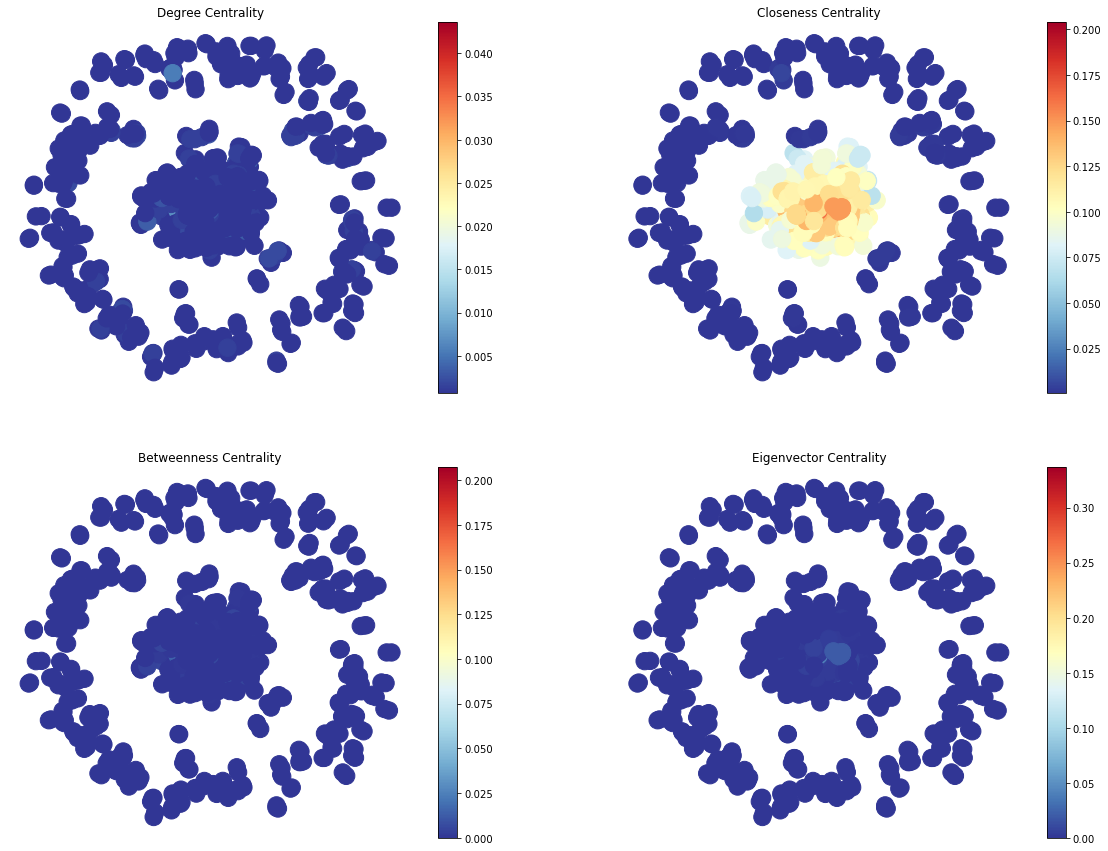

In [60]:
graph_centrality(C_2014)

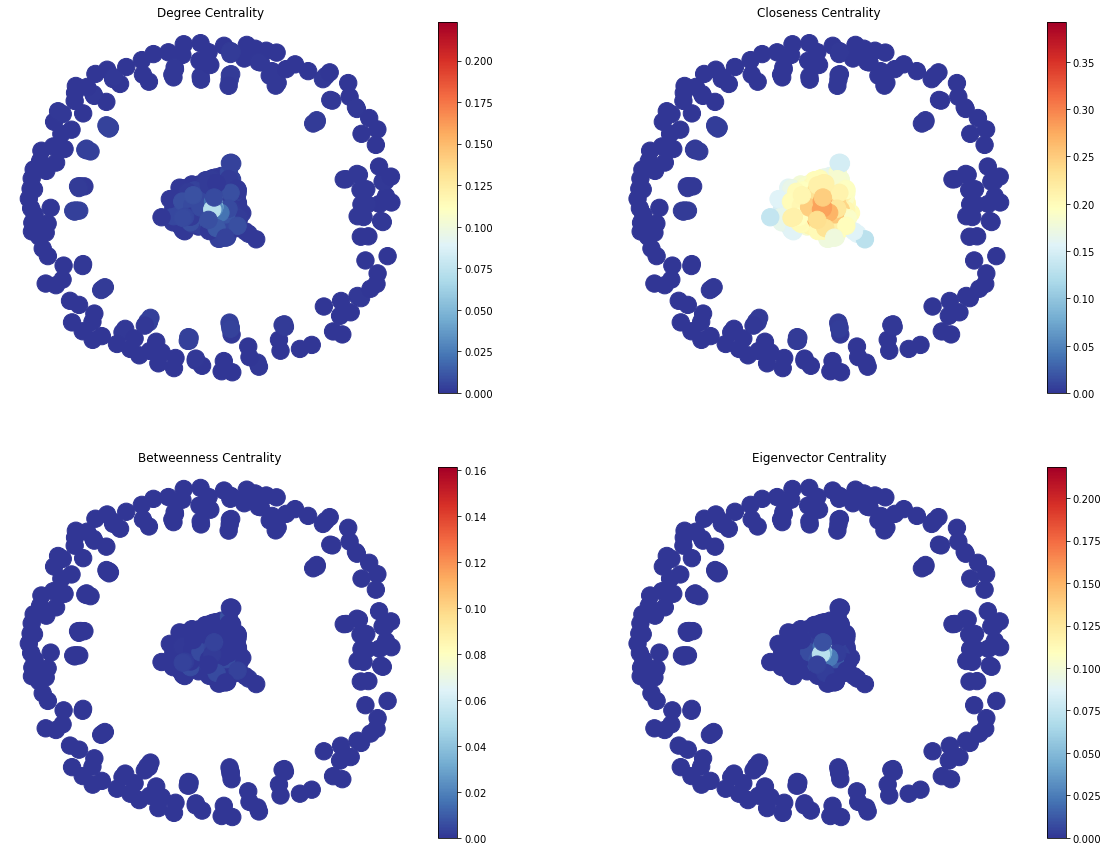

In [61]:
graph_centrality(A_2014)

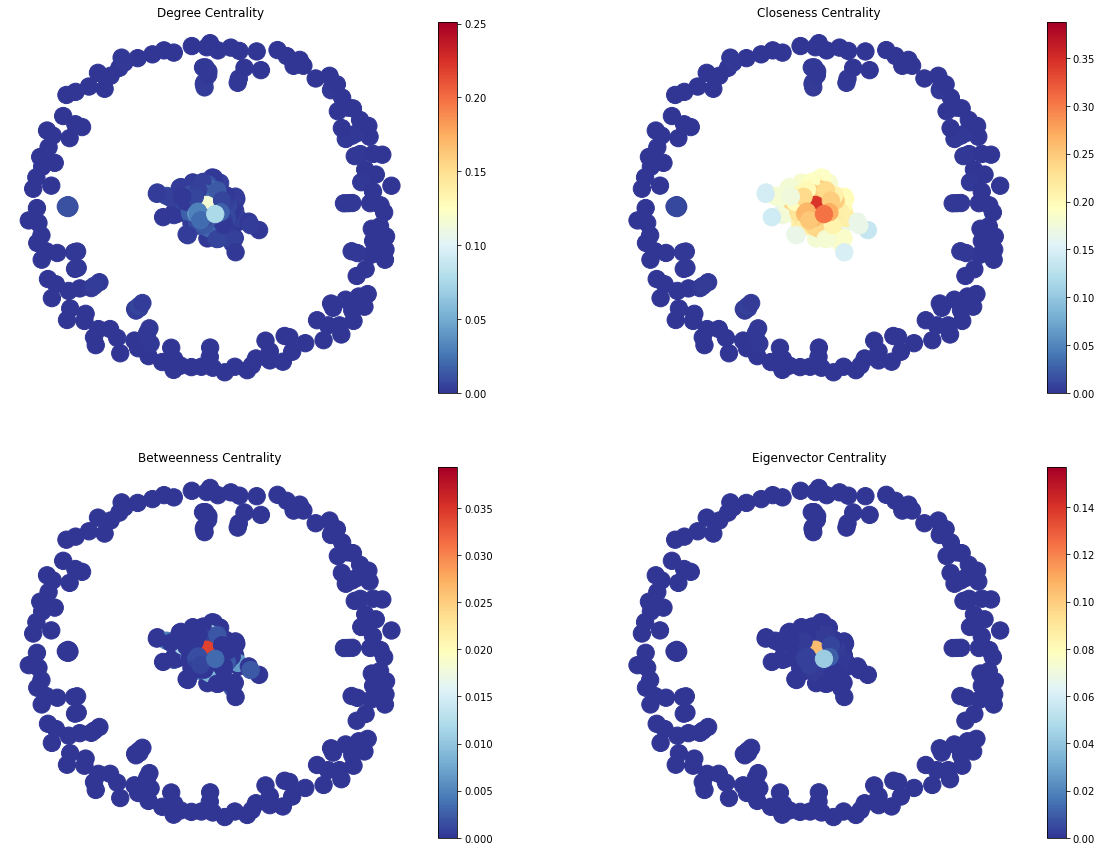

In [62]:
graph_centrality(O_2014)

### Top 20 by Network Centralities

After calculating the centralities, we rank them and get only the top 20. We then calculate the total contract amount won by the companies by contracting for the government last year.

In [63]:
top20_closeness(C_2014, data_2014)

,Awardee Corporate Title,Total Contract Amount
0,MASANGKAY COMPUTER CENTER,1.480700e+08
1,HOME DEVELOPMENT MUTUAL FUND - CORPORATE HEADQ...,0.000000e+00
2,DEPARTMENT OF SOCIAL WELFARE AND DEVELOPMENT -...,0.000000e+00
3,UNIVERSITY OF THE PHILIPPINES SYSTEM - DILIMAN,0.000000e+00
4,DEPARTMENT OF AGRICULTURE - MAIN,0.000000e+00
5,AMERICAN TECHNOLOGIES INC.,5.650493e+07
6,"COLUMBIA TECHNOLOGIES, INC.",1.895236e+08
7,PHILIPPINE NATIONAL OIL COMPANY - MAIN OFFICE,0.000000e+00
8,PCARRD-DEPARTMENT OF SCIENCE AND TECHNOLOGY,0.000000e+00
9,DEPARTMENT OF THE INTERIOR AND LOCAL GOVERNMEN...,0.000000e+00


In [64]:
top20_degree(C_2014, data_2014)

,Awardee Corporate Title,Total Contract Amount
0,MASANGKAY COMPUTER CENTER,1.480700e+08
1,UNIVERSITY OF THE PHILIPPINES SYSTEM - DILIMAN,0.000000e+00
2,"COLUMBIA TECHNOLOGIES, INC.",1.895236e+08
3,"ADVANCE SOLUTIONS, INC.",8.580256e+08
4,HOME DEVELOPMENT MUTUAL FUND - CORPORATE HEADQ...,0.000000e+00
5,LANDBANK OF THE PHILIPPINES - HEAD OFFICE,0.000000e+00
6,PROCUREMENT SERVICE,0.000000e+00
7,DCI INT'L. I.T. SOLUTIONS AND SERVICES CORPORA...,3.697213e+07
8,AMERICAN TECHNOLOGIES INC.,5.650493e+07
9,GOVERNMENT SERVICE INSURANCE SYSTEM,0.000000e+00


In [65]:
top20_bet(C_2014, data_2014)

,Awardee Corporate Title,Total Contract Amount
0,MASANGKAY COMPUTER CENTER,1.480700e+08
1,UNIVERSITY OF THE PHILIPPINES SYSTEM - DILIMAN,0.000000e+00
2,"COLUMBIA TECHNOLOGIES, INC.",1.895236e+08
3,AMERICAN TECHNOLOGIES INC.,5.650493e+07
4,HOME DEVELOPMENT MUTUAL FUND - CORPORATE HEADQ...,0.000000e+00
5,MARIANO MARCOS STATE UNIVERSITY,0.000000e+00
6,PROCUREMENT SERVICE,0.000000e+00
7,DEPARTMENT OF AGRICULTURE - MAIN,0.000000e+00
8,PHILCOPY CORPORATION,2.831024e+06
9,"ADVANCE SOLUTIONS, INC.",8.580256e+08


In [66]:
top20_eigen(C_2014, data_2014)

,Awardee Corporate Title,Total Contract Amount
0,MASANGKAY COMPUTER CENTER,1.480700e+08
1,"COLUMBIA TECHNOLOGIES, INC.",1.895236e+08
2,AMERICAN TECHNOLOGIES INC.,5.650493e+07
3,HOME DEVELOPMENT MUTUAL FUND - CORPORATE HEADQ...,0.000000e+00
4,"ADVANCE SOLUTIONS, INC.",8.580256e+08
5,PROCUREMENT SERVICE,0.000000e+00
6,UNIVERSITY OF THE PHILIPPINES SYSTEM - DILIMAN,0.000000e+00
7,DEPARTMENT OF SOCIAL WELFARE AND DEVELOPMENT -...,0.000000e+00
8,DCI INT'L. I.T. SOLUTIONS AND SERVICES CORPORA...,3.697213e+07
9,COMPUCARE CORPORATION (COMPUCARE CENTER),2.490004e+07


In [67]:
top20_closeness(A_2014, data_2014)

,Awardee Corporate Title,Total Contract Amount
0,MASANGKAY COMPUTER CENTER,1.480700e+08
1,AMERICAN TECHNOLOGIES INC.,5.650493e+07
2,"COLUMBIA TECHNOLOGIES, INC.",1.895236e+08
3,"PRONET SYSTEMS INTEGRATED NETWORK SOLUTION, INC.",1.495829e+08
4,S1 TECHNOLOGIES INC.,1.294067e+07
5,"INFOBAHN COMMUNICATIONS, INC.",6.530085e+07
6,COMPUCARE CORPORATION (COMPUCARE CENTER),2.490004e+07
7,BAYANPC TECHNOLOGIES INC.,4.037569e+06
8,IMAX TECHNOLOGIES INC.,4.474829e+06
9,"TRENDS & TECHNOLOGIES, INC.",2.516349e+08


In [68]:
top20_degree(A_2014, data_2014)

,Awardee Corporate Title,Total Contract Amount
0,AMERICAN TECHNOLOGIES INC.,5.650493e+07
1,MASANGKAY COMPUTER CENTER,1.480700e+08
2,"COLUMBIA TECHNOLOGIES, INC.",1.895236e+08
3,"TRENDS & TECHNOLOGIES, INC.",2.516349e+08
4,S1 TECHNOLOGIES INC.,1.294067e+07
5,"ADVANCE SOLUTIONS, INC.",8.580256e+08
6,COMPUCARE CORPORATION (COMPUCARE CENTER),2.490004e+07
7,IMAX TECHNOLOGIES INC.,4.474829e+06
8,"INFOBAHN COMMUNICATIONS, INC.",6.530085e+07
9,"PRONET SYSTEMS INTEGRATED NETWORK SOLUTION, INC.",1.495829e+08


In [69]:
top20_bet(A_2014, data_2014)

,Awardee Corporate Title,Total Contract Amount
0,MASANGKAY COMPUTER CENTER,1.480700e+08
1,"COLUMBIA TECHNOLOGIES, INC.",1.895236e+08
2,AMERICAN TECHNOLOGIES INC.,5.650493e+07
3,PHILCOPY CORPORATION,2.831024e+06
4,"TRENDS & TECHNOLOGIES, INC.",2.516349e+08
5,"REMAX INTERNATIONAL, INC.",2.813925e+07
6,"GEODATA SYSTEMS TECHNOLOGIES, INC.",2.176680e+07
7,"INFOBAHN COMMUNICATIONS, INC.",6.530085e+07
8,ELECTROBRAIN ENTERPRISES,6.998608e+05
9,NG KHAI DEVELOPMENT CORPORATION,3.632640e+07


In [70]:
top20_eigen(A_2014, data_2014)

,Awardee Corporate Title,Total Contract Amount
0,AMERICAN TECHNOLOGIES INC.,5.650493e+07
1,S1 TECHNOLOGIES INC.,1.294067e+07
2,"COLUMBIA TECHNOLOGIES, INC.",1.895236e+08
3,"PRONET SYSTEMS INTEGRATED NETWORK SOLUTION, INC.",1.495829e+08
4,IMAX TECHNOLOGIES INC.,4.474829e+06
5,"INFOBAHN COMMUNICATIONS, INC.",6.530085e+07
6,COMPUCARE CORPORATION (COMPUCARE CENTER),2.490004e+07
7,"ADVANCE SOLUTIONS, INC.",8.580256e+08
8,XITRIX COMPUTER CORPORATION,1.318898e+07
9,BAYANPC TECHNOLOGIES INC.,4.037569e+06


In [71]:
top20_closeness(O_2014, data_2014)

,Awardee Corporate Title,Total Contract Amount
0,HOME DEVELOPMENT MUTUAL FUND - CORPORATE HEADQ...,0
1,DEPARTMENT OF SOCIAL WELFARE AND DEVELOPMENT -...,0
2,DEPARTMENT OF AGRICULTURE - MAIN,0
3,PHILIPPINE NATIONAL OIL COMPANY - MAIN OFFICE,0
4,FOOD AND NUTRITION RESEARCH INSTITUTE,0
5,UNIVERSITY OF THE PHILIPPINES SYSTEM - DILIMAN,0
6,DEPARTMENT OF THE INTERIOR AND LOCAL GOVERNMEN...,0
7,PCARRD-DEPARTMENT OF SCIENCE AND TECHNOLOGY,0
8,SOCIAL SECURITY SYSTEM,0
9,DEPARTMENT OF SCIENCE AND TECHNOLOGY,0


In [72]:
top20_degree(O_2014, data_2014)

,Awardee Corporate Title,Total Contract Amount
0,HOME DEVELOPMENT MUTUAL FUND - CORPORATE HEADQ...,0
1,DEPARTMENT OF SOCIAL WELFARE AND DEVELOPMENT -...,0
2,PROCUREMENT SERVICE,0
3,DEPARTMENT OF AGRICULTURE - MAIN,0
4,FOOD AND NUTRITION RESEARCH INSTITUTE,0
5,UNIVERSITY OF THE PHILIPPINES SYSTEM - DILIMAN,0
6,PHILIPPINE NATIONAL OIL COMPANY - MAIN OFFICE,0
7,DEPARTMENT OF THE INTERIOR AND LOCAL GOVERNMEN...,0
8,PCARRD-DEPARTMENT OF SCIENCE AND TECHNOLOGY,0
9,SOCIAL SECURITY SYSTEM,0


In [73]:
top20_bet(O_2014, data_2014)

,Awardee Corporate Title,Total Contract Amount
0,UNIVERSITY OF THE PHILIPPINES SYSTEM - DILIMAN,0
1,DEPARTMENT OF SCIENCE AND TECHNOLOGY - REGION VII,0
2,MARIANO MARCOS STATE UNIVERSITY,0
3,HOME DEVELOPMENT MUTUAL FUND - CORPORATE HEADQ...,0
4,DEPARTMENT OF ENVIRONMENT AND NATURAL RESOURCE...,0
5,DEPARTMENT OF AGRICULTURE - MAIN,0
6,CEBU TECHNOLOGICAL UNIVERSITY - MAIN CAMPUS,0
7,DEPARTMENT OF AGRARIAN REFORM - NORTH BUKIDNON,0
8,PHILIPPINE NORMAL UNIVERSITY,0
9,PROCUREMENT SERVICE,0


In [74]:
top20_bet(O_2014, data_2014)

,Awardee Corporate Title,Total Contract Amount
0,UNIVERSITY OF THE PHILIPPINES SYSTEM - DILIMAN,0
1,DEPARTMENT OF SCIENCE AND TECHNOLOGY - REGION VII,0
2,MARIANO MARCOS STATE UNIVERSITY,0
3,HOME DEVELOPMENT MUTUAL FUND - CORPORATE HEADQ...,0
4,DEPARTMENT OF ENVIRONMENT AND NATURAL RESOURCE...,0
5,DEPARTMENT OF AGRICULTURE - MAIN,0
6,CEBU TECHNOLOGICAL UNIVERSITY - MAIN CAMPUS,0
7,DEPARTMENT OF AGRARIAN REFORM - NORTH BUKIDNON,0
8,PHILIPPINE NORMAL UNIVERSITY,0
9,PROCUREMENT SERVICE,0


In [75]:
x = nx.degree_centrality(C_2014)
{k: v for k, v in sorted(x.items(), key=lambda item: item[1], reverse=True)}

{'MASANGKAY COMPUTER CENTER': 0.04356992269852424,
 'UNIVERSITY OF THE PHILIPPINES SYSTEM - DILIMAN': 0.02600140548137737,
 'COLUMBIA TECHNOLOGIES, INC.': 0.025298664792691498,
 'ADVANCE SOLUTIONS, INC.': 0.023190442726633873,
 'HOME DEVELOPMENT MUTUAL FUND - CORPORATE HEADQUARTERS': 0.020379479971890373,
 'LANDBANK OF THE PHILIPPINES - HEAD OFFICE': 0.019676739283204497,
 'PROCUREMENT SERVICE': 0.019676739283204497,
 "DCI INT'L. I.T. SOLUTIONS AND SERVICES CORPORATION": 0.018973998594518624,
 'AMERICAN TECHNOLOGIES INC.': 0.017568517217146872,
 'GOVERNMENT SERVICE INSURANCE SYSTEM': 0.016163035839775124,
 'COMPUCARE CORPORATION (COMPUCARE CENTER)': 0.016163035839775124,
 'BAYANPC TECHNOLOGIES INC.': 0.015460295151089248,
 'DEPARTMENT OF SOCIAL WELFARE AND DEVELOPMENT - MAIN': 0.014054813773717499,
 'PHILIPPINE AMUSEMENT AND GAMING CORPORATION': 0.012649332396345749,
 'PRONET SYSTEMS INTEGRATED NETWORK SOLUTION, INC.': 0.012649332396345749,
 'BANGKO SENTRAL NG PILIPINAS': 0.01194659170

In [76]:
data_2014.loc[data_2014['Awardee Corporate Title']=='MASANGKAY COMPUTER CENTER']

,Organization Name,Notice Title,Awardee Corporate Title,Contract Amount
6106,PHILIPPINE INSTITUTE OF VOLCANOLOGY AND SEISMO...,Supply and Delivery of One (1) lot Laptops and...,MASANGKAY COMPUTER CENTER,640268.8
18335,PHILIPPINE INSTITUTE OF VOLCANOLOGY AND SEISMO...,Supply and Delivery of Workstation/Desktop PCs,MASANGKAY COMPUTER CENTER,399600.0
23474,COMMISSION ON ELECTIONS,SUPPLY AND DELIVERY OF IT EQUIPMENT AND PERIPH...,MASANGKAY COMPUTER CENTER,742000.0
23477,COMMISSION ON ELECTIONS,SUPPLY AND DELIVERY OF IT EQUIPMENT AND PERIPH...,MASANGKAY COMPUTER CENTER,161000.0
23478,COMMISSION ON ELECTIONS,SUPPLY AND DELIVERY OF IT EQUIPMENT AND PERIPH...,MASANGKAY COMPUTER CENTER,701120.0
...,...,...,...,...
671474,DEPARTMENT OF SOCIAL WELFARE AND DEVELOPMENT -...,Supply and Delivery of Information and Communi...,MASANGKAY COMPUTER CENTER,419986.0
671475,DEPARTMENT OF SOCIAL WELFARE AND DEVELOPMENT -...,Supply and Delivery of Information and Communi...,MASANGKAY COMPUTER CENTER,149875.0
687420,PHILIPPINE HEALTH INSURANCE CORPORATION - CAR,Procurement of 1 Lot Regular IT Equipment 2014,MASANGKAY COMPUTER CENTER,2848912.0
693353,"MUNICIPALITY OF INFANTA, QUEZON",PROCUREMENT OF TEN (10) UNITS OF LAPTOP AND ON...,MASANGKAY COMPUTER CENTER,270000.0


In [77]:
df_final_2014.loc[df_final_2014['Awardee Corporate Title']=='MASANGKAY COMPUTER CENTER'].sort_values(by=['weight'])

,Organization Name,Awardee Corporate Title,weight
638,DEPARTMENT OF THE INTERIOR AND LOCAL GOVERNMEN...,MASANGKAY COMPUTER CENTER,1
1327,PHILIPPINE HEALTH INSURANCE CORPORATION - REGI...,MASANGKAY COMPUTER CENTER,1
1764,WESTERN PHILIPPINES UNIVERSITY,MASANGKAY COMPUTER CENTER,1
1329,PHILIPPINE HEALTH INSURANCE CORPORATION - REGI...,MASANGKAY COMPUTER CENTER,1
686,DR. JOSE FABELLA MEMORIAL HOSPITAL,MASANGKAY COMPUTER CENTER,1
...,...,...,...
1679,UNIVERSITY OF RIZAL SYSTEM,MASANGKAY COMPUTER CENTER,7
163,CARAGA STATE UNIVERSITY,MASANGKAY COMPUTER CENTER,9
23,APAYAO STATE COLLEGE,MASANGKAY COMPUTER CENTER,9
1073,NATIONAL ECONOMIC AND DEVELOPMENT AUTHORITY - ...,MASANGKAY COMPUTER CENTER,10


### Degree Distribution

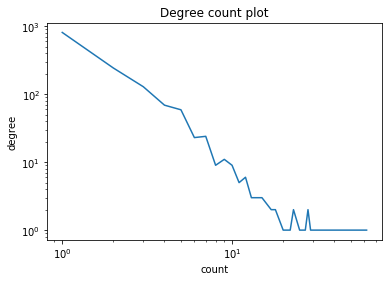

In [78]:
deg_distribution(C_2014)

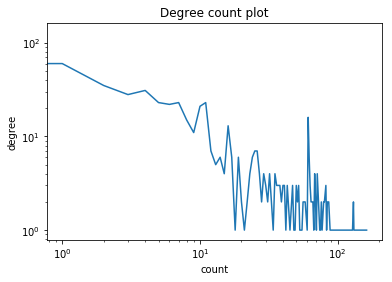

In [79]:
deg_distribution(O_2014)

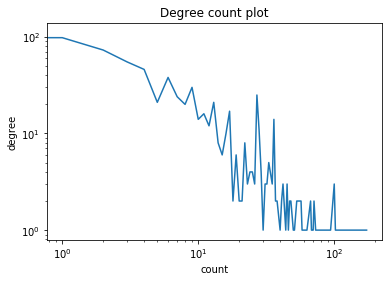

In [80]:
deg_distribution(A_2014)

Different layouts for the projected graph A was tested.

The bipartite and projected graphs exhibit a power law distribution of their degrees.

### Exploring Graph Layouts

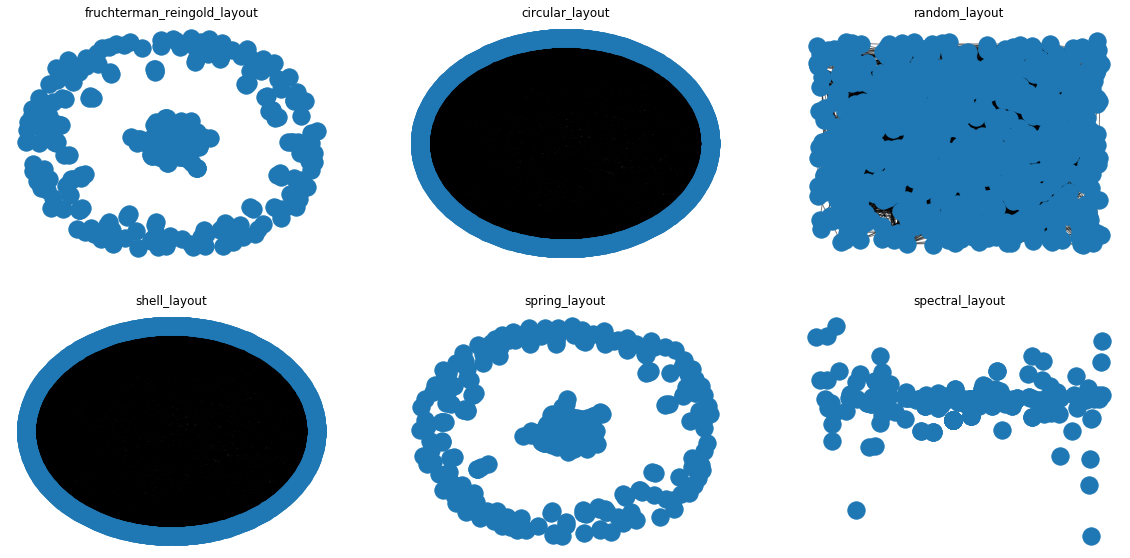

In [81]:
graph_layout(A_2014)

To be able to create Gephi visualtizations of the graph, we convert it to **gexf**

In [82]:
#Convert to gexf for Gephi
nx.write_gexf(C_2014, "C_all_IT2014.gexf")
nx.write_gexf(O_2014, "O_all_IT2014.gexf")
nx.write_gexf(A_2014, "A_all_IT2014.gexf")

### Plotting Communities

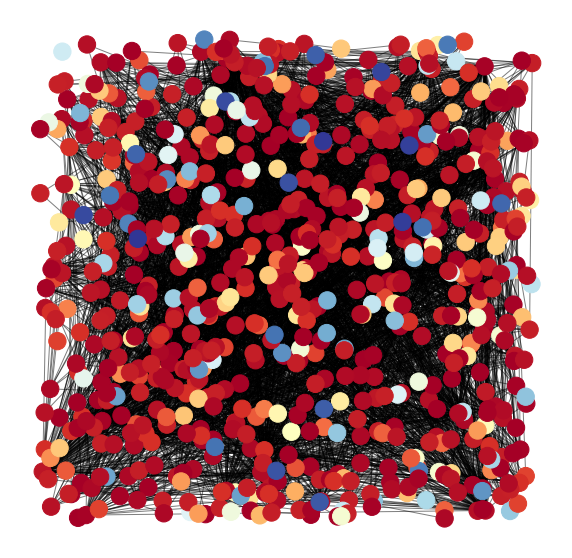

Number of Communities:  160


In [83]:
G_2014 = A_2014
partition = community.best_partition(G_2014)

plt.figure(figsize=(10,10))
plt.axis('off')
pos = nx.random_layout(G_2014)
nx.draw_networkx_nodes(G_2014, pos, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_edges(G_2014, pos, alpha=0.5)
# nx.draw_networkx_labels(G, pos)
plt.show()
print ("Number of Communities: ", len(set(partition.values())))